<a href="https://colab.research.google.com/github/PalmChalan/AI-Engineering-Coursework/blob/main/Regression/House-Price-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction (Linear Regression)
Updated on 16 Feb 2024

![](https://lc.zoocdn.com/9f2d741927ffa878efa9a4ffa181dfcb119f7fc3.jpg)

## Import packages

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 10]
#plt.rcParams['figure.figsize'] = [7, 5]

## Load data & explore data

In [ ]:
!wget -N https://www.dropbox.com/s/3pzyqphvbp6xa5e/housing.csv

--2025-09-12 14:23:54--  https://www.dropbox.com/s/3pzyqphvbp6xa5e/housing.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/vre9li2crgjxv7wz630g8/housing.csv?rlkey=0q4s902jyyyyff2n3oy0fulzt [following]
--2025-09-12 14:23:55--  https://www.dropbox.com/scl/fi/vre9li2crgjxv7wz630g8/housing.csv?rlkey=0q4s902jyyyyff2n3oy0fulzt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8fa3b2bad5a65d0eed2afd601b.dl.dropboxusercontent.com/cd/0/inline/CxOhyxNoufF5rIUn404fGv-BPRTw-ig17FyJUtxsdte8R6P40JBhHQGH0FOaz37LgCfMj2aAN3BgelpzDQ0JqKswIqWjOZmmVK59TRmIXXFOLoK_o1gFMifEpB-RLNpmfK4/file# [following]
--2025-09-12 14:23:55--  https://uc8fa3b2bad5a65d0eed2afd601b.dl.dropboxusercontent.com/cd/0/inline/CxOhyxNoufF5rIUn404fGv

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bos1 = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Boston House Price dataset has 14 features and their description is given as follows:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per dollar 10,000.

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000's


In [ ]:
# data frame with first 5 rows (by default)
bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# dimension
bos1.shape

(506, 14)

In [ ]:
pd.set_option("display.precision", 2)
bos1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [ ]:
# correlation
pd.set_option("display.precision", 2)
bos1.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


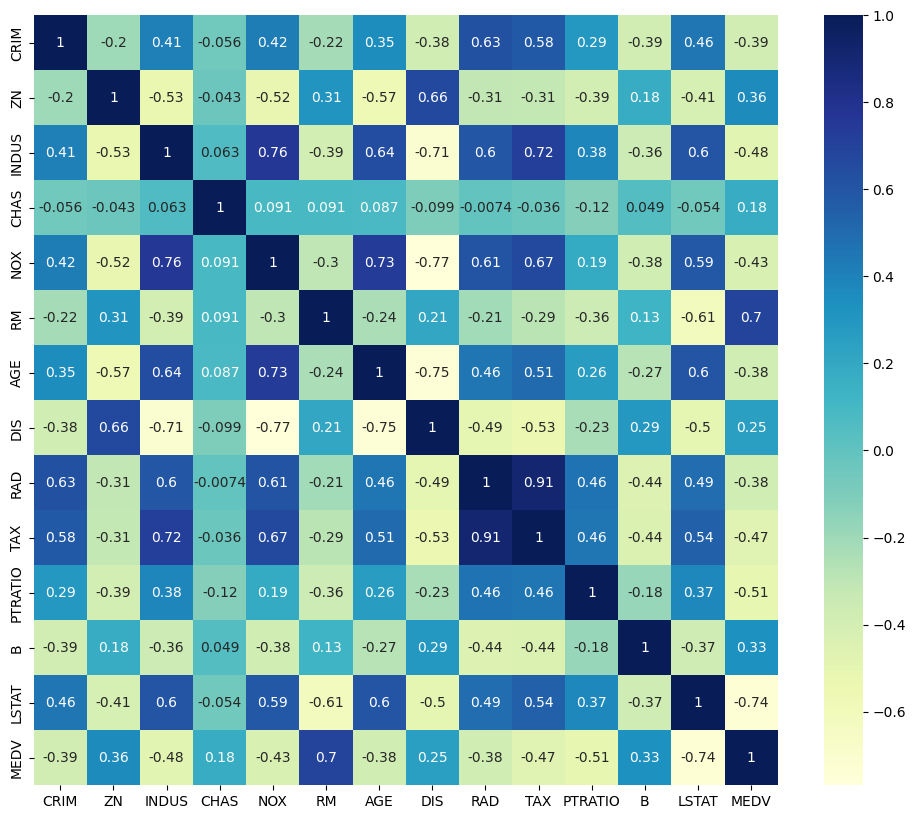

In [ ]:
plt.figure(figsize=(12,10))
cor = bos1.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
#Correlation with output variable
cor = bos1.corr()
cor_target = abs(cor["MEDV"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

,MEDV
RM,0.70
PTRATIO,0.51
LSTAT,0.74
MEDV,1.00


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

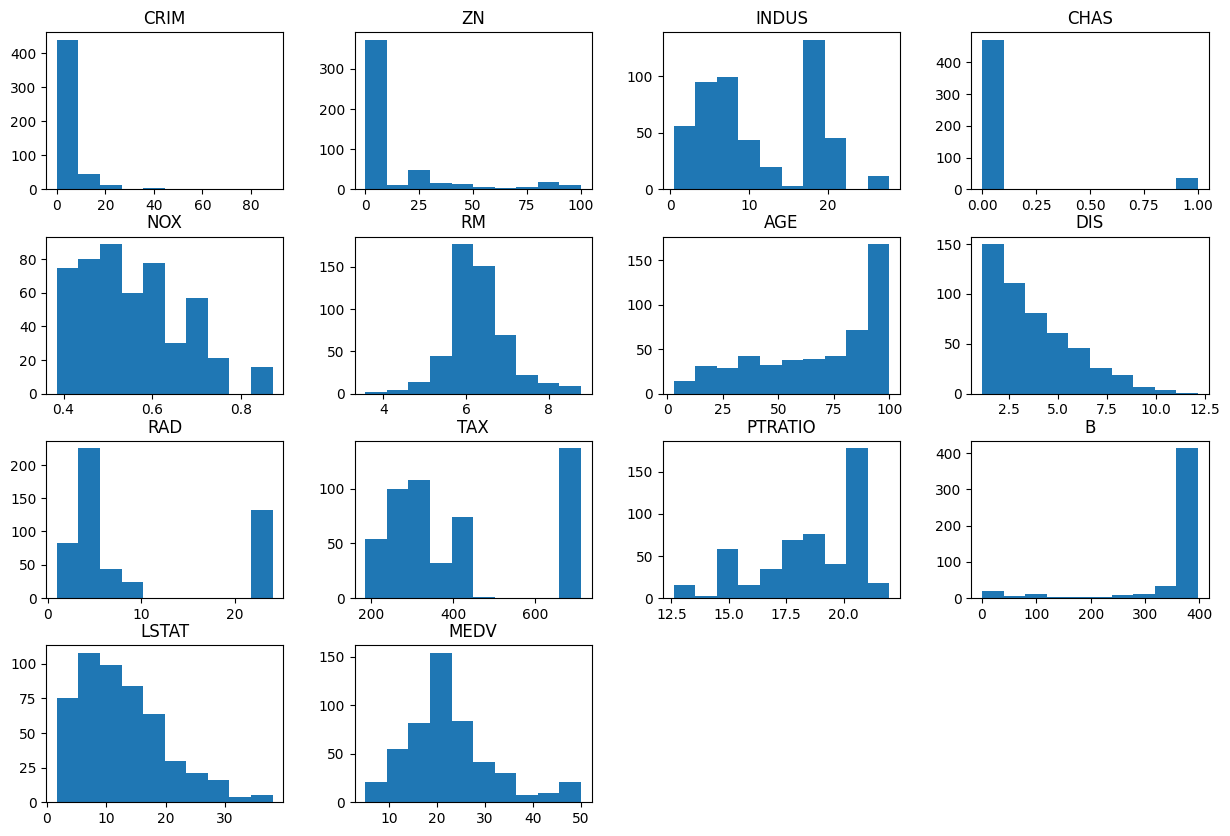

In [ ]:
bos1.hist(bins=10,figsize=(15,10),grid=False)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
[ 5.20765239  2.21906306  0.29414628  3.39579929  0.72714416  0.40241467
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -2.88179835
  0.90377074  1.10481082]


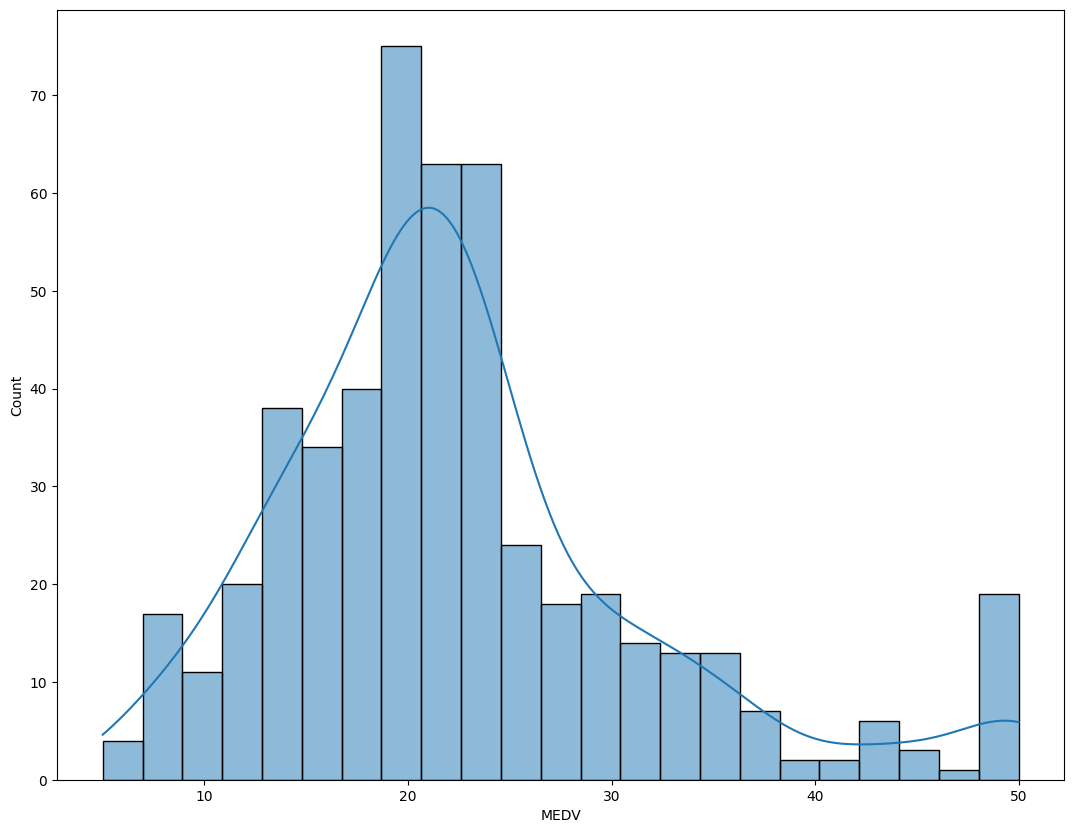

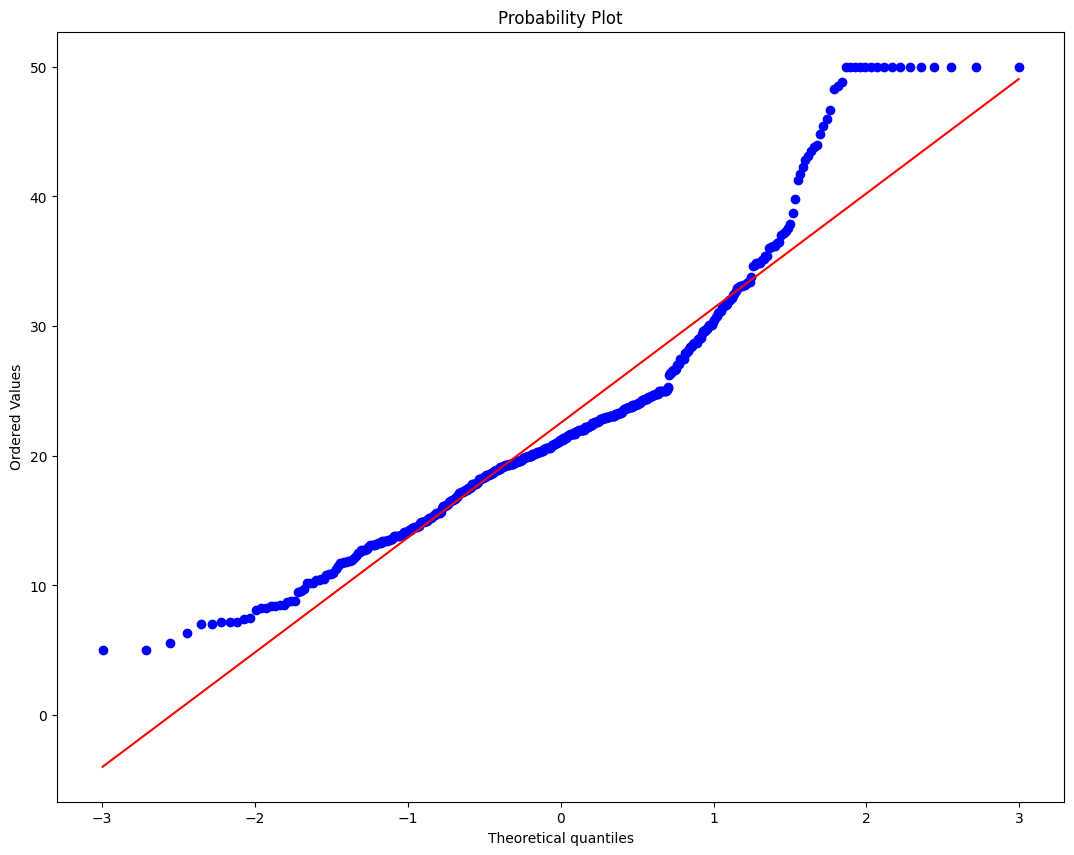

In [ ]:
from scipy import stats
#histogram and normal probability plot
print( bos1.columns )
print( stats.skew(bos1) )

sns.histplot(bos1['MEDV'], kde=True)
fig = plt.figure()
res = stats.probplot(bos1['MEDV'], plot=plt)

## Variable selection (manually)

In [ ]:
# variable selection
x = bos1.drop(columns=['MEDV'])
x = x[['RM','PTRATIO', 'LSTAT']]
y = bos1["MEDV"]
print(x.shape)
print(y.shape)

(506, 3)
(506,)


## Train / test split

In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.33, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')
22.929119574306025
[ 4.21798734 -1.07042016 -0.57236016]


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
226,37.6,36.42
292,27.9,27.65
90,22.6,25.90
373,13.8,2.10
273,35.2,31.69


In [ ]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print( "RMSE = ", round(math.sqrt(mse),2) )
print( "Average house price =", round(y_test.mean(),2) )

# R^2
print( "R^2 = ", round(model.score(x_test,y_test),2) )

RMSE =  5.81
Average house price = 22.52
R^2 =  0.64


In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

,Actual,Predict
226,37.6,36.42
292,27.9,27.65
90,22.6,25.90
373,13.8,2.10
273,35.2,31.69
...,...,...
48,14.4,8.91
281,35.4,33.74
42,25.3,26.46
115,18.3,19.86


**Selected Variable**
1.   RM
2.   PTRATIO
3.   LSTAT

**Multiple Regression**

MEDV = 22.93 + 4.22RM - 1.07PTRATIO - 0.57LSTAT

**RMSE** = 5.81

**R-Squared** = 0.64
